In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad, dblquad, tplquad, simpson

# Funções

## Regra do Trapézio

In [3]:
def trapeze_rule(f, a, b):
    return (b - a)/2 * (f(a) + f(b))

def trapeze_rule_by_samples(x, y):
    result = 0

    for i in range(len(y) - 1):
        result += (x[i + 1] - x[i]) / 2 * (y[i] + y[i + 1])

    return result

def repeated_trapeze_rule(f, a, b, m):
    h = (b - a) / m
    x = np.linspace(a, b, m + 1)
    fx = f(x)
    result = (h / 2) * (fx[0] + 2 * np.sum(fx[1:-1]) + fx[-1])

    return result

## Interpolação de Langrange

In [4]:
def lagrange_interpolation(x, xi, yi):
  n = len(xi)
  sum = 0

  for k in range(n):
    prod = 1
    for j in range(n):
      if j != k:
        prod *= (x - xi[j]) / (xi[k] - xi[j])
    sum += yi[k] * prod

  return sum

## Regra 1/3 de Simpson

In [5]:
def simpson_one_third(f, a, b):
    '''
    Aproxima f(x) por um polinômio interpolador de grau 2
    '''
    h = (b - a) / 2
    x1 = a + h
    result = (h / 3) * (f(a) + 4 * f(x1) + f(b))

    return result

def simpson_one_third_by_samples(x, y):
    result = 0
    X = np.c_[x[:-2:2], x[1:-1:2], x[2::2]]
    Y = np.c_[y[:-2:2], y[1:-1:2], y[2::2]]

    for xi, yi in zip(X, Y):
        h = (xi[2] - xi[0]) / 2
        result += h / 3 * (yi[0] + 4 * yi[1] + yi[2])

    return result

def repeated_simpson_one_third(f, a, b, m):
    '''
    parâmetro m precisa ser múltiplo de 2
    '''
    h = (b - a) / m
    x = np.linspace(a, b, m + 1)
    fx = f(x)
    c = np.array([1] + [4, 2] * int((m - 2) / 2) + [4, 1])
    result = (h / 3) * np.sum(c * fx)

    return result

def repeated_simpson_one_third_by_samples(x, y, m):
    '''
    parâmetro m precisa ser múltiplo de 2
    '''
    h = (x[-1] - x[0]) / m
    xi = np.linspace(x[0], x[-1], m + 1)
    fxi = np.array([lagrange_interpolation(num, x, y) for num in xi])
    c = np.array([1] + [4, 2] * int((m - 2) / 2) + [4, 1])
    result = (h / 3) * np.sum(c * fxi)

    return result

## Regra 3/8 de Simpson

In [6]:
def simpson_three_eighths(f, a, b):
    '''
    Aproxima f(x) por um polinômio interpolador de grau 3
    '''
    h = (b - a) / 3
    x1, x2 = a + h, a + 2 * h
    result = (3 * h / 8) * (f(a) + 3 * f(x1) + 3 * f(x2) + f(b))

    return result

def simpson_three_eighths_by_samples(x, y):
    result = 0
    X = np.c_[x[:-3:3], x[1:-2:3], x[2:-1:3], x[3::3]]
    Y = np.c_[y[:-3:3], y[1:-2:3], y[2:-1:3], y[3::3]]

    for xi, yi in zip(X, Y):
        h = (xi[3] - xi[0]) / 3
        result += 3 * h / 8 * (yi[0] + 3 * yi[1] + 3 * yi[2] + yi[3])

    return result

def repeated_simpson_three_eighths(f, a, b, m):
    h = (b - a) / m
    x = np.linspace(a, b, m + 1)
    fx = f(x)
    c = np.array([1] + [3] * (m - 1) + [1])
    c[int(len(c) / 2)] = 2
    result = (3 * h / 8) * np.sum(c * fx)

    return result

def repeated_simpson_three_eighths_by_samples(x, y):
    h = x[1] - x[0]
    integral = 3 * h / 8 * (y[0] + y[-1] + 3 * y[1:-1:3].sum() + 3 * y[2:-1:3].sum() + 2 * y[3:-1:3].sum())

    return integral

## Integral Dupla

In [7]:
def double_integral(x, y, fxy, integrate):
  dx_integral = []
  for i,fxy_value in enumerate(fxy):
    dx_integral.append(integrate(x, fxy_value))

  dx_integral = np.array(dx_integral)

  return integrate(y, dx_integral)

## Integral Tripla

In [8]:
def triple_integral(x, y, z, fxyz, integrate):
  integral_dydx = []

  for i,ri in enumerate(fxyz):
    integral_dx = []

    for i,rij in enumerate(ri):
      itg = integrate(x, rij)
      integral_dx.append(itg)

    itg = integrate(y, integral_dx)
    integral_dydx.append(itg)

  return integrate(z, integral_dydx)

## Intervalagem amostral

In [9]:
def find_intervals(arr):
  intervals = []
  current_diff = arr[1] - arr[0]
  current_indices = [0, 1]

  for i in range(2, len(arr)):
    diff = arr[i] - arr[i-1]

    if diff == current_diff:
      current_indices.append(i)
    else:
      intervals.append(current_indices)
      current_indices = [i-1, i]
      current_diff = diff

  intervals.append(current_indices)
  return intervals

# 1) Calcule a seguinte integral:

# $$ ∫_{0}^{π/2} (6 + 3cos(x)) dx $$

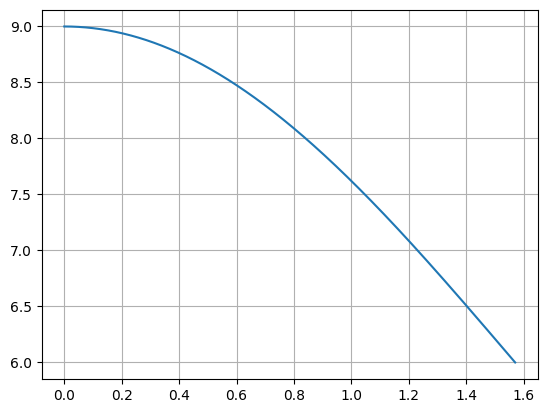

In [ ]:
f = lambda x: 6 + 3*np.cos(x)
a, b = 0, np.pi/2

intevals = np.linspace(a, b, 1001)
plt.plot(intevals, f(intevals))
plt.grid()
plt.show()

## (a) Por uma única e múltiplas aplicações da regra do trapézio: 1 ≤ 𝑛 ≤ 10;

In [ ]:
trapeze_rule(f, a, b)

11.780972450961723

In [ ]:
n1a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
r1a = []

for i in n1a:
    res = repeated_trapeze_rule(f, a, b, i)
    r1a.append(res)
    print(f'[n = {i}]: {res}')

[n = 1]: 11.780972450961723
[n = 2]: 12.268956307674939
[n = 3]: 12.355923810739938
[n = 4]: 12.386125363687706
[n = 5]: 12.40006326703356
[n = 6]: 12.407623625645853
[n = 7]: 12.41217860180199
[n = 8]: 12.415133476427888
[n = 9]: 12.417158656144556
[n = 10]: 12.41860691983245


## (b) Por uma única e múltiplas aplicações da regra 1/3 de Simpson: 𝑛 = 2, 4, 6, 8, 10;

In [ ]:
simpson_one_third(f, a, b)

12.43161759324601

In [ ]:
n1b = [2, 4, 6, 8, 10]
r1b = []

for i in n1b:
    res = repeated_simpson_one_third(f, a, b, i)
    r1b.append(res)
    print(f'[n = {i}]: {res}')

[n = 2]: 12.43161759324601
[n = 4]: 12.425181715691961
[n = 6]: 12.424856897281158
[n = 8]: 12.424802847341281
[n = 10]: 12.42478813743208


## (c) Por uma única e múltiplas aplicações das regras de 1/3 e 3/8 de Simpson: 𝑛 = 3, 4, 5, 6, 7, 8, 9, 10


In [ ]:
res13 = simpson_one_third(f, a, b)
print(f"Resultado via 1/3 de Simpson: {res13:.4f}")

res38 = simpson_three_eighths(f, a, b)
print(f"Resultado via 3/8 de Simpson: {res38:.4f}")

Resultado via 1/3 de Simpson: 12.4316
Resultado via 3/8 de Simpson: 12.4278


In [ ]:
N = np.arange(3,11)
r13c = []
r38c = []

for i in N:
    if i%2 == 0:
        res13 = repeated_simpson_one_third(f, a, b, i)
        r13c.append(res13)
        print(f'[Simpson 1/3: n = {i}]: {res13}')

    res38 = repeated_simpson_three_eighths(f, a, b, i)
    r38c.append(res38)
    print(f'[Simpson 3/8: n = {i}]: {res38}\n')

[Simpson 3/8: n = 3]: 10.955171174342

[Simpson 1/3: n = 4]: 12.425181715691961
[Simpson 3/8: n = 4]: 11.633961726459617

[Simpson 3/8: n = 5]: 12.151899438602747

[Simpson 1/3: n = 6]: 12.424856897281158
[Simpson 3/8: n = 6]: 12.424957040392217

[Simpson 3/8: n = 7]: 12.670278951131216

[Simpson 1/3: n = 8]: 12.424802847341281
[Simpson 3/8: n = 8]: 12.816810507136848

[Simpson 3/8: n = 9]: 12.959519502314887

[Simpson 1/3: n = 10]: 12.42478813743208
[Simpson 3/8: n = 10]: 13.050761061735887



## (d) Plote os resultados de cada cálculo de integral nos itens (a), (b) e (c) versus n

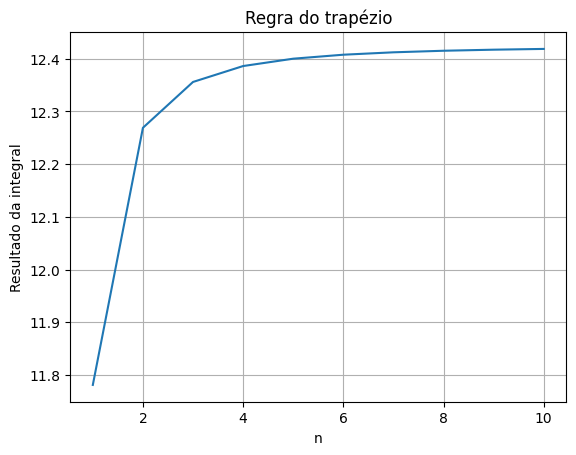

In [ ]:
plt.plot(n1a, r1a)
plt.title("Regra do trapézio")
plt.xlabel("n")
plt.ylabel("Resultado da integral")
plt.grid()
plt.show()

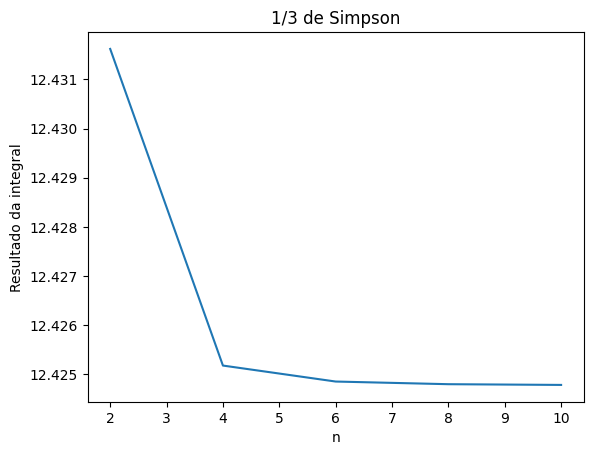

In [ ]:
plt.plot(n1b, r1b)
plt.title("1/3 de Simpson")
plt.xlabel("n")
plt.ylabel("Resultado da integral")
plt.show()

## (e) Plote os valores de erro verdadeiro (calculados em relação ao valor do cálculo analítico da integral para cada situação dos itens (a), (b) e (c) em função de n)

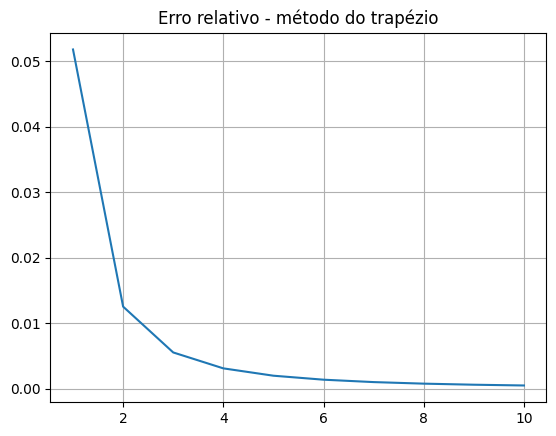

In [ ]:
value = 3*np.pi + 3

erro1a = np.abs(np.array(r1a) - value) / value
plt.plot(n1a, erro1a)
plt.title('Erro relativo - método do trapézio')
plt.grid()
plt.show()

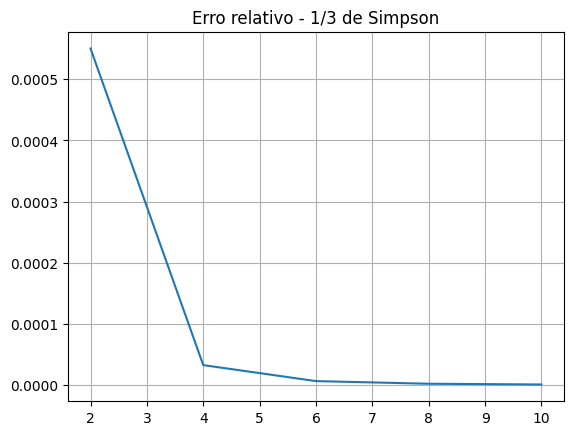

In [ ]:
value = 3*np.pi + 3

erro1b = np.abs(np.array(r1b) - value) / value
plt.plot(n1b, erro1b)
plt.title('Erro relativo - 1/3 de Simpson')
plt.grid()
plt.show()

In [ ]:
#C ???
#C ???
#C ???

# 2) Seja a seguinte integral

#$$ ∫_{0}^{3} x^{2}e^{x} dx $$

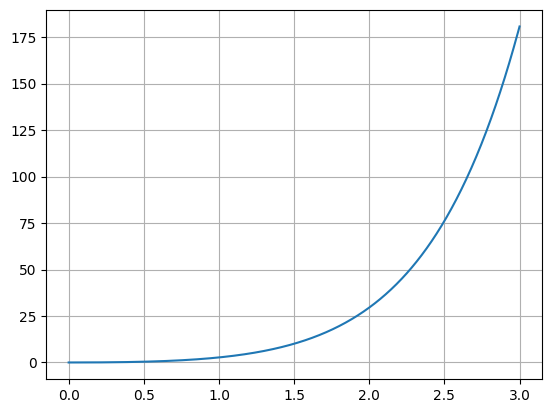

In [ ]:
f = lambda x: x**2 * np.exp(x)
a, b = 0, 3

intevals = np.linspace(a, b, 1001)
plt.plot(intevals, f(intevals))
plt.grid()
plt.show()

## (a) Calcule a quantidade de subintervalos necessários para que o resultado da aplicação múltipla da regra do trapézio apresente erro relativo aproximado abaixo de 0.01. Demonstre a evolução através do gráfico dos valores de erro aproximado em função da quantidade de subintervalos.

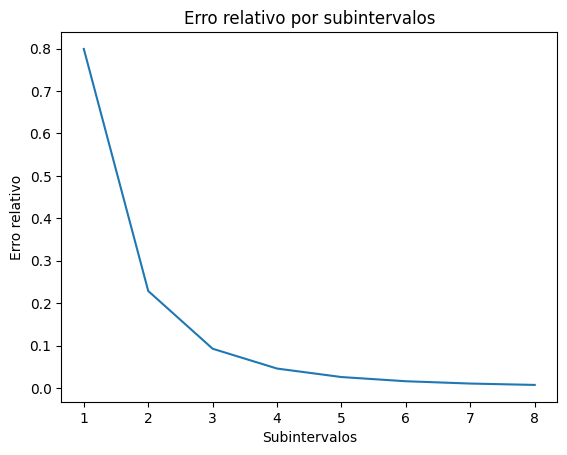

In [ ]:
i = 1
res = repeated_trapeze_rule(f, a, b, i)
epsilon = 0.01
erro2a = []

while True:
    i += 1
    res_ant = res
    res = repeated_trapeze_rule(f, a, b, i)
    error = abs((res - res_ant) / res)
    erro2a.append(error)

    if error < epsilon:
        break

plt.plot(range(1, i), erro2a)
plt.title("Erro relativo por subintervalos")
plt.xlabel("Subintervalos")
plt.ylabel("Erro relativo")
plt.show()

##(b) Repita o mesmo procedimento com a aplicação múltipla da regra 1/3 de Simpson.

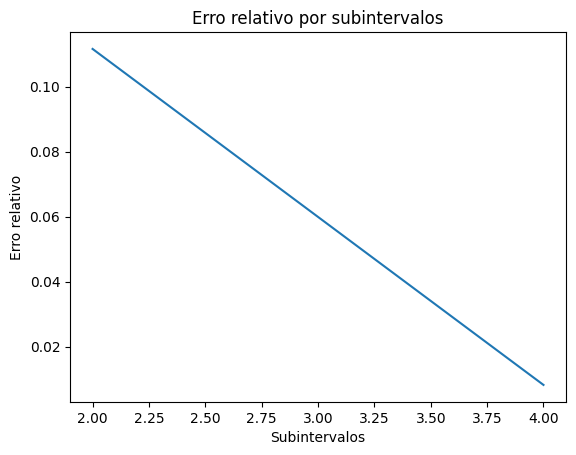

In [ ]:
i = 2
res = repeated_simpson_one_third(f, a, b, i)
epsilon = 0.01
erro2b = []

while True:
    i += 2
    res_ant = res
    res = repeated_simpson_one_third(f, a, b, i)
    error = abs((res - res_ant) / res)
    erro2b.append(error)

    if error < epsilon:
        break

plt.plot(range(2,i,2), erro2b)
plt.title("Erro relativo por subintervalos")
plt.xlabel("Subintervalos")
plt.ylabel("Erro relativo")
plt.show()

# 3) Determine a distância percorrida a partir dos seguintes dados de velocidade, segundo os critérios abaixo, bem como a velocidade média

$$
\begin{array}{|c|c|c|}
\hline
\text{t, min} & \text{1} & \text{2} & \text{3.25} & \text{4.5} & \text{6} & \text{7} & \text{8} & \text{9} & \text{9.5} & \text{10}\\
\hline
\text{V, m/s} & \text{5} & \text{6} & \text{5.5} & \text{7} & \text{8.5} & \text{8} & \text{6} & \text{7} & \text{7} & \text{5}\\
\hline
\end{array}
$$

In [10]:
t_min = np.array([1, 2, 3.25, 4.5, 6, 7, 8, 9, 9.5, 10]) * 60
v_ms = np.array([5, 6, 5.5, 7, 8.5, 8, 6, 7, 7, 5])

## (a) Usando aplicações individuais e/ou múltiplas da regra do Trapézio;

In [11]:
trapeze_rule_by_samples(t_min, v_ms)

3622.5

## (b) Usando aplicações individuais e/ou múltiplas da regra 1/3 de Simpson;

In [12]:
simpson_one_third_by_samples(t_min, v_ms)

3476.25

## (c) Usando aplicações individuais e/ou múltiplas da regra 3/8 de Simpson;

In [13]:
simpson_three_eighths_by_samples(t_min, v_ms)

3656.25

# 4) Calcule a integral dos seguintes dados tabulares com (a) a regra do Trapézio e (b) as regras de Simpson.

$$
\begin{array}{|c|c|c|}
\hline
\text{x} & \text{-2} & \text{0} & \text{2} & \text{4} & \text{6} & \text{8} & \text{10}\\
\hline
\text{f(x)} & \text{35} & \text{5} & \text{-10} & \text{2} & \text{5} & \text{3} & \text{20}\\
\hline
\end{array}
$$

In [ ]:
x = [-2, 0, 2, 4, 6, 8, 10]
fx = [35, 5, -10, 2, 5, 3, 20]

## a) Regra do trapézio

In [ ]:
trapeze_rule_by_samples(x, fx)

65.0

## b) Regras de Simpson

### 1/3

In [ ]:
simpson_one_third_by_samples(x, fx)

56.666666666666664

### 3/8

In [ ]:
simpson_three_eighths_by_samples(x, fx)

51.0

# 5) Calcule a seguinte integral dupla

#$$ ∫_{-1}^{1} ∫_{0}^{2} (x^2 - 2y^2 + xy^3) dxdy $$

In [ ]:
f = lambda x,y : x**2 - 2*y**2 + x*y**3
x, y = [0, 2], [-1, 1]
true_res = dblquad(f, y[0], y[1], x[0], x[1])[0]
true_res

2.666666666666667

## (a) Usando a aplicação múltipla da regra do trapézio com n = 4;

In [ ]:
x = np.linspace(0, 2, 4)
y = np.linspace(-1, 1, 4)
fxy = f(*np.meshgrid(x,y))
res_trap = double_integral(x, y, fxy, trapeze_rule_by_samples)
print(f"Resultado da integral: {res_trap}")

Resultado da integral: 2.3703703703703702


## (b) Usando uma aplicação única da regra 1/3 de Simpson;

In [ ]:
x = np.linspace(0, 2, 3)
y = np.linspace(-1, 1, 3)
fxy = f(*np.meshgrid(x,y))
res_13 = double_integral(x, y, fxy, simpson_one_third_by_samples)
print(f"Resultado da integral: {res_13}")

Resultado da integral: 2.6666666666666665


## (c) Usando uma aplicação única da regra 3/8 de Simpson;

In [ ]:
x = np.linspace(0, 2, 4)
y = np.linspace(-1, 1, 4)
fxy = f(*np.meshgrid(x,y))
res_38 = double_integral(x, y, fxy, simpson_three_eighths_by_samples)
print(f"Resultado da integral: {res_38}")

Resultado da integral: 2.6666666666666665


## (d) Calcule o erro relativo percentual verdadeiro para cada situação.

In [ ]:
err_trap = 100*np.abs((true_res - res_trap)/true_res)
print(f'Erro percentual via regra do trapézio: {err_trap} %')

err_13 = 100*np.abs((true_res - res_13)/true_res)
print(f'Erro percentual via 1/3 de simpson: {err_13} %')

err_38 = 100*np.abs((true_res - res_38)/true_res)
print(f'Erro percentual via 3/8 de Simpson: {err_38} %')

Erro percentual via regra do trapézio: 11.111111111111125 %
Erro percentual via 1/3 de simpson: 1.6653345369377345e-14 %
Erro percentual via 3/8 de Simpson: 1.6653345369377345e-14 %


# 6) Calcule a seguinte integral tripla usando uma única aplicação da regra 1/3 de Simpson.

#$$ ∫_{-2}^{2} ∫_{0}^{2} ∫_{-3}^{1} (x^3 - 3yz)dxdydz$$


In [ ]:
f = lambda x,y,z: x**3 - 3*y*z
x = [-3, 1]
y = [0, 2]
z = [-2, 2]
true_res = tplquad(f, z[0], z[1], y[0], y[1], x[0], x[1])[0]
true_res

-160.0

In [ ]:
x = np.linspace(-3, 1, 3)
y = np.linspace(0, 2, 3)
z = np.linspace(-2, 2, 3)
fxyz = f(*np.meshgrid(x, y, z))

triple_integral(x, y, z, fxyz, simpson_one_third_by_samples)

-160.0

# 7) A massa total de uma haste de densidade de densidade variável é dada por

# $$ m = ∫_{0}^{L} ρ(x).A_{c}(x) dx$$

# em que m é a massa, $ρ(x)$ é a densidade, $A_{c}(x)$ é a área da seção transversal, $x$ é a distância ao longo da haste, e $L$ é o comprimento total da haste. Os seguintes dados foram medidos para uma haste de 10 m. Determine a massa em quilogramas com a melhor precisão possível.

$$
\begin{array}{|c|c|c|}
\hline
\text{$x (m)$} & \text{0} & \text{2} & \text{3} & \text{4} & \text{6} & \text{8} & \text{10}\\
\hline
\text{$ρ (g/cm^3)$} & \text{4,00} & \text{3,95} & \text{3,89} & \text{3,80} & \text{3,60} & \text{3,41} & \text{3,30}\\
\hline
\text{$A_{c}$ $(cm^2)$} & \text{100} & \text{103} & \text{106} & \text{110} & \text{120} & \text{133} & \text{150}\\
\hline
\end{array}
$$



In [ ]:
x = np.array([0, 2, 3, 4, 6, 8, 10])
p = np.array([4, 3.95, 3.89, 3.80, 3.60, 3.41, 3.30])
Ac = np.array([100, 103, 106, 110, 120, 133, 150])
y = p * Ac

In [ ]:
result = 0
intervals = find_intervals(x)

for interval in intervals:
  if len(interval) == 2:
    result += trapeze_rule_by_samples(x[interval], y[interval])
  if len(interval) == 3:
    result += simpson_one_third_by_samples(x[interval], y[interval])
  elif len(interval) == 4:
    result += simpson_three_eighths_by_samples(x[interval], y[interval])

result

4308.779166666667

# 8) Um estudo em engenharia de transporte exige que você determine o número de carros que passa por uma intersecção durante o horário de rush da manhã. Você fica em um lado da estrada e conta o número de carros que passa a cada 4 minutos em diferentes instantes, como tabulado a seguir. Use o melhor método numérico para determinar (a) o número total de carros que passam entre 07:30 e 09:15, e (b) a taxa de carros passando pela interseção por minuto.

$$
\begin{array}{|c|c|c|}
\hline
\text{Horário (h)} & \text{7:30} & \text{7:45} & \text{8:00} & \text{8:15} & \text{8:45} & \text{9:15}\\
\hline
\text{Taxa (carros/4 min.)} & \text{18} & \text{24} & \text{14} & \text{24} & \text{21} & \text{9}\\
\hline
\end{array}
$$


In [ ]:
H = np.array([7*60 + 30, 7*60 + 45, 8*60 + 00, 8*60 + 15, 8*60 + 45, 9*60 + 15])
T = np.array([18, 24, 14, 24, 21, 9]) / 4

## a) o número total de carros que passam entre 07:30 e 09:15

In [ ]:
result = 0
intervals = find_intervals(H)

for interval in intervals:
  if len(interval) == 3:
    result += simpson_one_third_by_samples(H[interval], T[interval])
  elif len(interval) == 4:
    result += simpson_three_eighths_by_samples(H[interval], T[interval])

result

511.875

## b) a taxa de carros passando pela interseção por minuto

In [ ]:
result / (H[-1] - H[0])

4.875